In [1]:
import numpy as np
import matplotlib.pyplot as plt
import hypertools as hyp

plt.style.use('ggplot')

%matplotlib inline

In [2]:
from sklearn.datasets import load_digits

In [3]:
digits = load_digits()

In [4]:
digits.data.shape

(1797, 64)

In [5]:
digits.data[0].reshape(8, 8).shape

(8, 8)

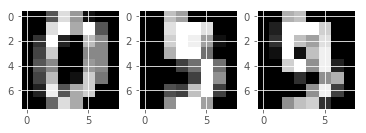

In [6]:
%matplotlib inline

plt.subplot(1, 3, 1)
plt.imshow(digits.data[0].reshape(8, 8), cmap='gray')
plt.subplot(1, 3, 2)
plt.imshow(digits.data[5].reshape(8, 8), cmap='gray')
plt.subplot(1, 3, 3)
plt.imshow(digits.data[9].reshape(8, 8), cmap='gray')
plt.show()

In [7]:
digits.target[[0, 5, 9]]

array([0, 5, 9])

In [24]:
# kerasで遊ぶ
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras import utils, losses, optimizers
from keras import backend as K

In [34]:
X_train, X_test, y_train, y_test = train_test_split(digits.data, digits.target, test_size=0.2, random_state=71)

In [49]:
batch_size = 128
num_classes = 10
epochs = 10

# input image dimensions
img_rows, img_cols = 8, 8

input_shape = (img_rows * img_cols,)
x_train = X_train.astype('float32')
x_test = X_test.astype('float32')

# convert class vectors to binary class matrices
_y_train = utils.to_categorical(y_train, num_classes)
_y_test = utils.to_categorical(y_test, num_classes)

model = Sequential()
model.add(Dense(128, activation='relu', input_shape=input_shape))
model.add(Dropout(0.5))
model.add(Dense(64, activation='relu', input_shape=input_shape))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))

model.compile(loss=losses.categorical_crossentropy,
              optimizer=optimizers.Adam(),
              metrics=['accuracy'])

In [50]:
x_train.shape

(1437, 64)

In [51]:
history = model.fit(x_train, _y_train,
    batch_size=batch_size,
    epochs=epochs,
    verbose=1,
    validation_data=(x_test, _y_test))

Train on 1437 samples, validate on 360 samples
Epoch 1/10
1437/1437 [==============================] - 0s 253us/step - loss: 8.5569 - acc: 0.1468 - val_loss: 2.3641 - val_acc: 0.2944
Epoch 2/10
1437/1437 [==============================] - 0s 23us/step - loss: 4.9710 - acc: 0.1740 - val_loss: 1.5284 - val_acc: 0.5111
Epoch 3/10
1437/1437 [==============================] - 0s 24us/step - loss: 3.1349 - acc: 0.2568 - val_loss: 1.3501 - val_acc: 0.6944
Epoch 4/10
1437/1437 [==============================] - 0s 24us/step - loss: 2.2994 - acc: 0.3055 - val_loss: 1.2623 - val_acc: 0.7194
Epoch 5/10
1437/1437 [==============================] - 0s 25us/step - loss: 1.8639 - acc: 0.3918 - val_loss: 1.1158 - val_acc: 0.7639
Epoch 6/10
1437/1437 [==============================] - 0s 24us/step - loss: 1.6323 - acc: 0.4621 - val_loss: 0.9748 - val_acc: 0.7972
Epoch 7/10
1437/1437 [==============================] - 0s 24us/step - loss: 1.5184 - acc: 0.4767 - val_loss: 0.8378 - val_acc: 0.8139
Epoch 8

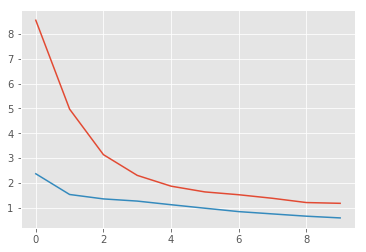

In [52]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.show()

In [53]:
y_test.shape, model.predict(x_test).shape

((360,), (360, 10))

In [54]:
print(classification_report(y_train, np.argmax(model.predict(x_train), axis=1)))

             precision    recall  f1-score   support

          0       0.97      0.99      0.98       146
          1       0.75      0.85      0.80       133
          2       0.94      0.95      0.94       139
          3       0.84      0.90      0.87       149
          4       0.96      0.95      0.95       136
          5       0.90      0.94      0.92       145
          6       0.98      0.95      0.97       151
          7       0.80      0.99      0.89       150
          8       0.88      0.50      0.64       141
          9       0.89      0.81      0.85       147

avg / total       0.89      0.89      0.88      1437



In [55]:
print(classification_report(y_test, np.argmax(model.predict(x_test), axis=1)))

             precision    recall  f1-score   support

          0       0.91      0.97      0.94        32
          1       0.83      0.88      0.85        49
          2       0.85      0.92      0.89        38
          3       0.93      0.82      0.87        34
          4       0.92      0.98      0.95        45
          5       0.79      0.92      0.85        37
          6       0.93      0.83      0.88        30
          7       0.83      1.00      0.91        29
          8       0.85      0.52      0.64        33
          9       0.83      0.76      0.79        33

avg / total       0.87      0.86      0.86       360



<IPython.core.display.Javascript object>


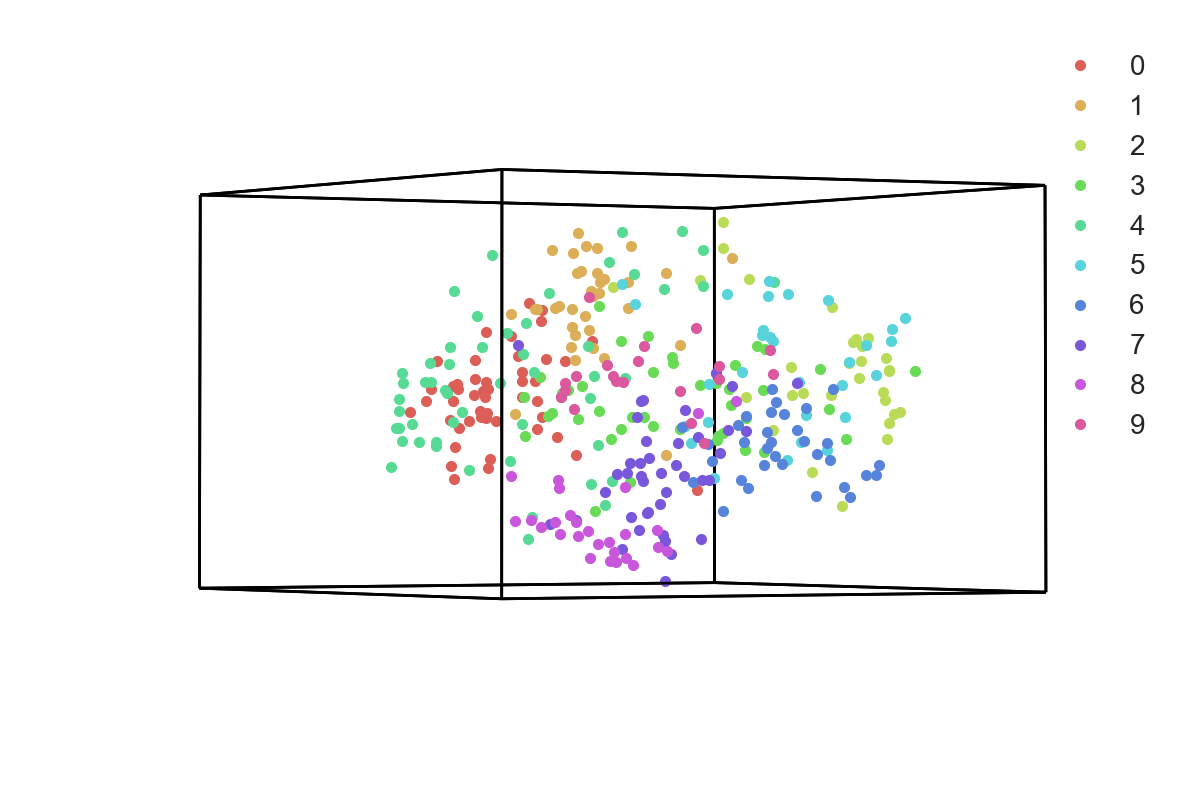

In [63]:
%matplotlib notebook
hyp.plot(X_test, '.', hue=np.argmax(model.predict(X_test), axis=1).astype(np.int64), legend=list(range(10)), show=True)